In [1]:
#y = 2x^2 + 8

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [3]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Veri noktaları')

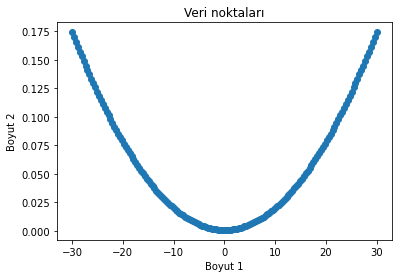

In [4]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Veri noktaları')

In [5]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [6]:
neural_net.trainf = nl.train.train_gd #gradient descent optimizasyon algoritmasını kullanacağımı bildirdim

In [7]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 1.1146080509058425;
Epoch: 200; Error: 0.4182227512493649;
Epoch: 300; Error: 0.33844338226409154;
Epoch: 400; Error: 0.2617213951744942;
Epoch: 500; Error: 0.24253541987122837;
Epoch: 600; Error: 0.17703749788929063;
Epoch: 700; Error: 0.14655801238487803;
Epoch: 800; Error: 0.1292137544418969;
Epoch: 900; Error: 0.1200067503125503;
Epoch: 1000; Error: 0.10949019729483149;
The maximum number of train epochs is reached


In [8]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Eğitim hatası süreci')

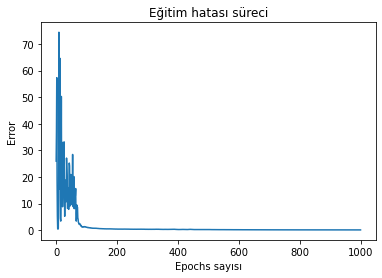

In [10]:
plt.figure()
plt.plot(error)
plt.xlabel('Epochs sayısı')
plt.ylabel('Error')
plt.title('Eğitim hatası süreci')

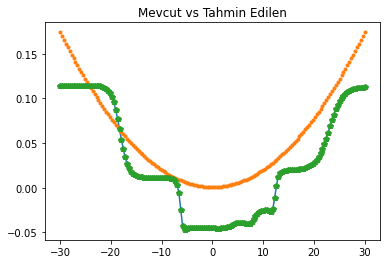

In [13]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Mevcut vs Tahmin Edilen')
plt.show()

In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow'


In [3]:
import tensorflow as tf
import numpy as np


In [4]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)], dtype = 'int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)], dtype = 'int32')

print(matrix1)
print(matrix2)

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

matrix3 = np.array([(2,7,2),(1,4,2),(9,0,2)], dtype = 'float32')
print(matrix3)

matrix_det = tf.matrix_determinant(matrix3)

with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)
    
print(result1)
print(result2)
print(result3)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
55.999992


In [5]:
#single layer perceptron with tensorflow

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

import tensorflow as tf

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
#integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]


In [12]:
#binary encoding
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [13]:
#invert edebiliyor muyuz? 
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']
